In [1]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 20.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

df = pd.read_excel('Tesis_MichaelÑacato_TabulacionDatos_293Estudiantes.xlsx')

In [4]:

df.columns = ['ID', 'Colegio', 'Edad', 'Genero', 'Institucion Educativa',
              'Area de Residencia', 'Año Escolar', 'Idiomas', 
              'Nivel Educativo Padres', 'Ingreso Familiar',
              'Actividades de Interes', 'Actividades Gustan Realizar',
              'Asignaturas Favoritas', 'Carreras Atractivas',
              'Influencia Estudio Futuro', 'Maestros Ciencia/tecnologia',
              'Opiniones Amigos Ciencia/Tecnologia', 'Apoyo Familiar Ciencia/Mate',
              'Obstaculos Carrera STEAM', 'Sectores Interes Futuro',
              'Optimismo Futuro Ciencia/Tecnologia', 'Estabilidad Economica',
              'Impacto Social/Tecnologico', 'Innovaciones Tecnologicas',
              'Avance Tecnologico', 'Probabilidad Carrera STEAM',
              'Informacion Opciones Carrera STEAM']

In [5]:

df = df.applymap(lambda x: x.strip().replace('\n', ' ').replace('\r', '') if isinstance(x, str) else x)

/tmp/ipykernel_77/3721720208.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip().replace('\n', ' ').replace('\r', '') if isinstance(x, str) else x)


In [6]:

df_dummies = pd.get_dummies(df['Genero'], prefix='Genero')

df = pd.concat([df, df_dummies], axis=1)

df['Edad'] = df['Edad'].str.replace('años', '').astype(int)

opciones_dict = {
    'Opción 1': 1,
    'Opción 2': 2,
    'Opción 3': 3,
    'Opción 4': 4,
    'Opción 5': 5
}

columnas_categoricas = [
    'Optimismo Futuro Ciencia/Tecnologia','Probabilidad Carrera STEAM','Apoyo Familiar Ciencia/Mate','Maestros Ciencia/tecnologia',
    'Estabilidad Economica',
    'Innovaciones Tecnologicas'
]

for columna in columnas_categoricas:
    df[columna] = df[columna].map(opciones_dict)

ingreso_dict = {
    'Más de $3000': 3500,
    '$2000 - $3000': 2500,
    '$1001 - $2000': 1500,
    '$501 - $1000': 750,
    'Menos de $500': 250
}

df['Ingreso Familiar'] = df['Ingreso Familiar'].map(ingreso_dict)

nivel_educativo_dict = {
    'Primaria': 1,
    'Secundaria': 2,
    'Bachillerato': 3,
    'Universidad': 4,
    'Postgrado': 5
}
df['Nivel Educativo Padres'] = df['Nivel Educativo Padres'].map(nivel_educativo_dict)

In [7]:

df['Asignaturas_Matematica'] = df['Asignaturas Favoritas'].str.contains('Matemática', case=False, na=False).astype(int)
df['Asignaturas_Fisica'] = df['Asignaturas Favoritas'].str.contains('Física', case=False, na=False).astype(int)
df['Sector_de_interes_futuro_Tecnología'] = df['Sectores Interes Futuro'].str.contains('Tecnología', case=False, na=False).astype(int)
df['Sector_de_interes_futuro_Salud'] = df['Sectores Interes Futuro'].str.contains('Salud', case=False, na=False).astype(int)
df['Genero_Femenino'] = df['Genero_Femenino'].astype(int)
df['Genero_Masculino'] = df['Genero_Masculino'].astype(int)

df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()

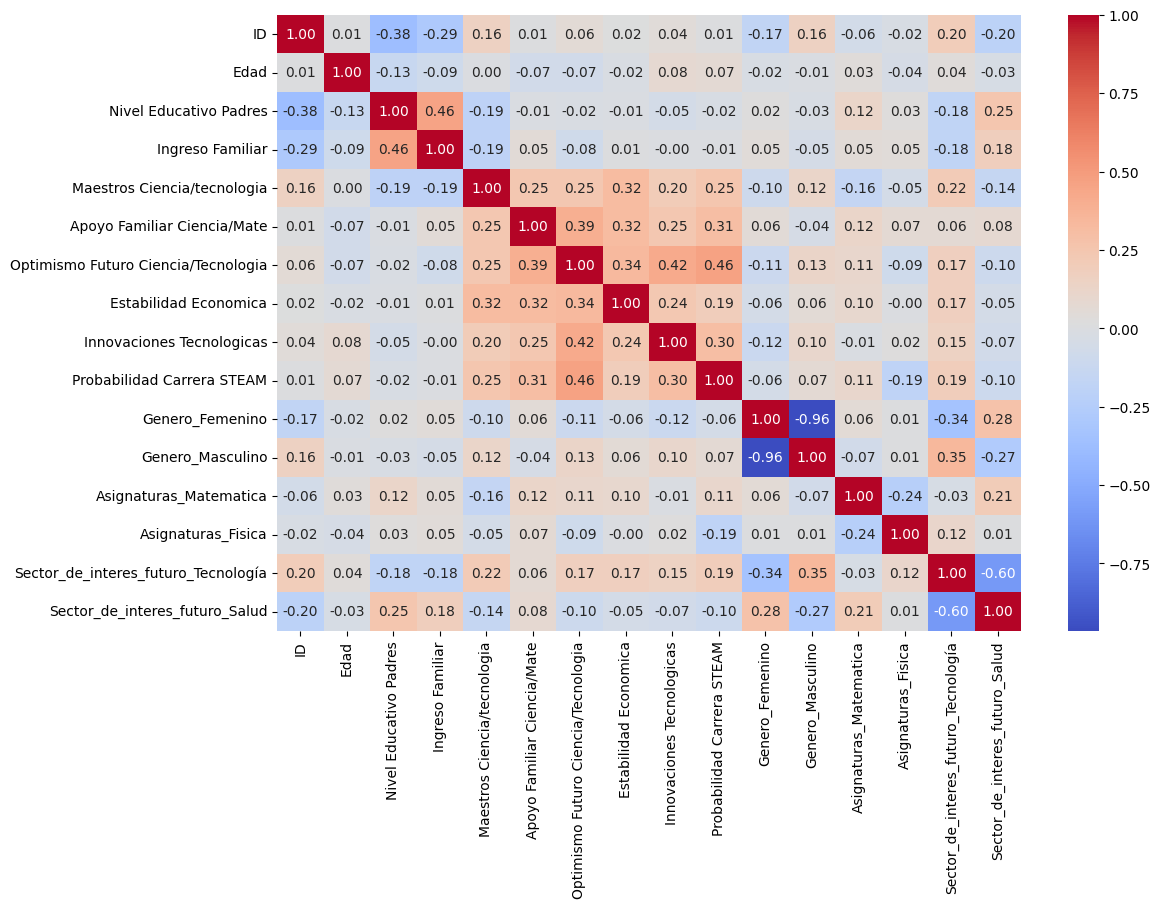

In [8]:

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [9]:
# Extraer las correlaciones con la variable 'Probabilidad Carrera STEAM'
correlaciones_steam = correlation_matrix['Probabilidad Carrera STEAM'].sort_values(ascending=False)
correlaciones_steam

Probabilidad Carrera STEAM             1.000000
Optimismo Futuro Ciencia/Tecnologia    0.463862
Apoyo Familiar Ciencia/Mate            0.307612
Innovaciones Tecnologicas              0.302021
Maestros Ciencia/tecnologia            0.252246
Sector_de_interes_futuro_Tecnología    0.192393
Estabilidad Economica                  0.189331
Asignaturas_Matematica                 0.107702
Genero_Masculino                       0.069471
Edad                                   0.066721
ID                                     0.008874
Ingreso Familiar                      -0.005324
Nivel Educativo Padres                -0.023225
Genero_Femenino                       -0.057888
Sector_de_interes_futuro_Salud        -0.104682
Asignaturas_Fisica                    -0.185107
Name: Probabilidad Carrera STEAM, dtype: float64

In [10]:
!pip install statsmodels==0.14.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 45.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [11]:
import statsmodels.api as sm

# Define the predictor variables (significant ones from correlation analysis)
predictor_variables = [
    'Optimismo Futuro Ciencia/Tecnologia',
    'Apoyo Familiar Ciencia/Mate',
    'Innovaciones Tecnologicas',
    'Maestros Ciencia/tecnologia',
    'Sector_de_interes_futuro_Tecnología'
]

# Define the target variable
target_variable = 'Probabilidad Carrera STEAM'

# Prepare the data for regression analysis
X = df_numeric[predictor_variables]
Y = df_numeric[target_variable]

# Add a constant to the predictor variables (for the intercept)
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(Y, X).fit()

# Store the model summary
model_summary = model.summary()
model_summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Probabilidad Carrera STEAM   R-squared:                       0.264
Model:                                    OLS   Adj. R-squared:                  0.252
Method:                         Least Squares   F-statistic:                     20.63
Date:                        Fri, 21 Feb 2025   Prob (F-statistic):           1.35e-17
Time:                                07:30:49   Log-Likelihood:                -423.18
No. Observations:                         293   AIC:                             858.4
Df Residuals:                             287   BIC:                             880.4
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.8639      0.293      2.948      0.003       0.287       1.441
Optimismo Futuro Ciencia/Tecnologia     0.3441      0.062      5.585      0.000       0.223       0.465
Apoyo Familiar Ciencia/Mate             0.1205      0.056      2.154      0.032       0.010       0.231
Innovaciones Tecnologicas               0.1100      0.065      1.704      0.090      -0.017       0.237
Maestros Ciencia/tecnologia             0.1078      0.058      1.866      0.063      -0.006       0.222
Sector_de_interes_futuro_Tecnología     0.2148      0.125      1.712      0.088      -0.032       0.462
==============================================================================
Omnibus:                        3.086   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.789
Skew:                          -0.225   Prob(JB):                        0.248
Kurtosis:                       3.158   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> hacer lso  graficos de regresion lineal

Visualizar las relaciones entre las variables predictoras y la variable objetivo utilizando gráficos de regresión lineal. 

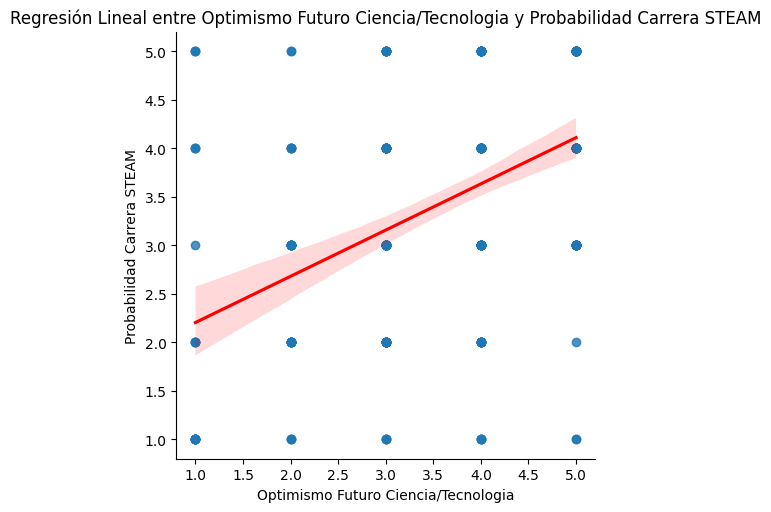

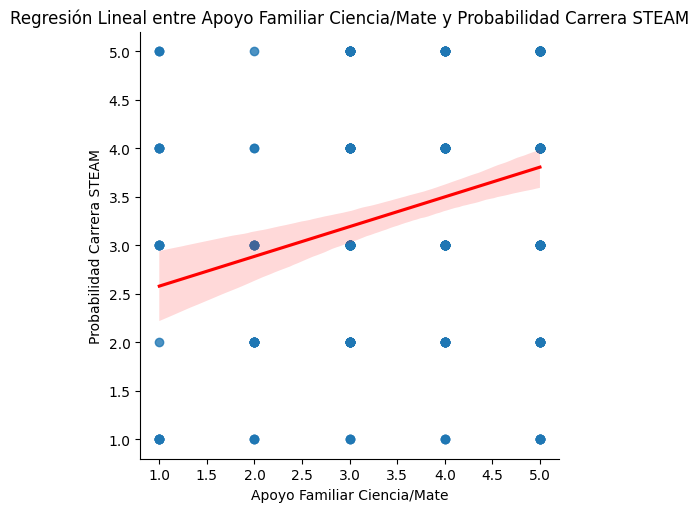

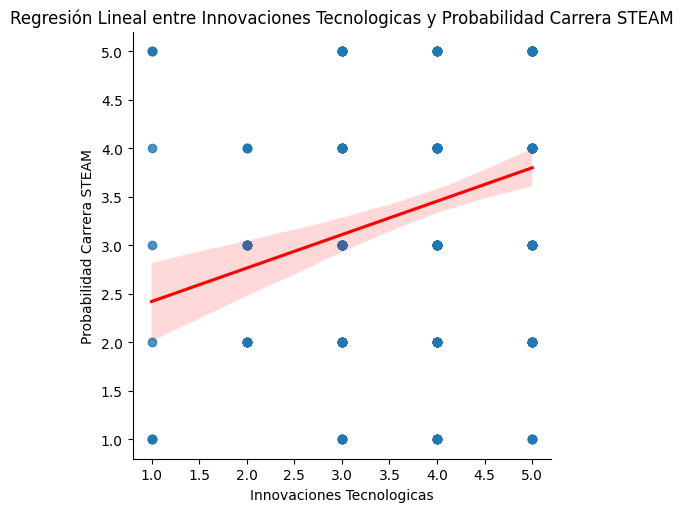

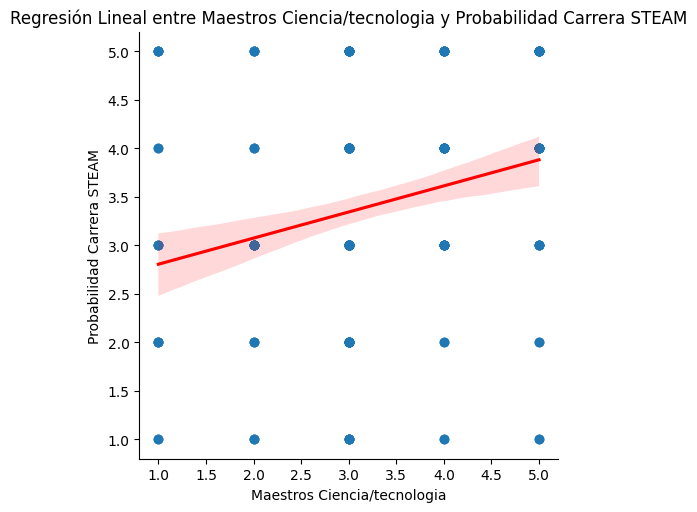

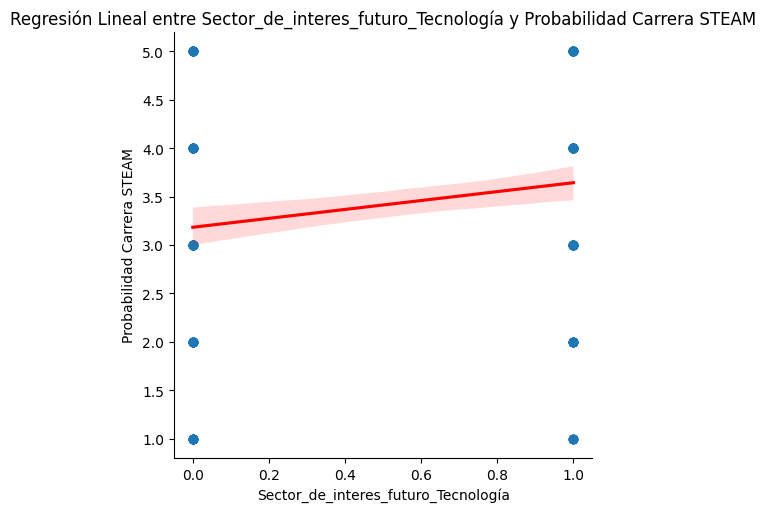

In [12]:
for predictor in predictor_variables:
    sns.lmplot(x=predictor, y=target_variable, data=df_numeric, line_kws={'color': 'red'})
    plt.title(f'Regresión Lineal entre {predictor} y {target_variable}')
    plt.xlabel(predictor)
    plt.ylabel(target_variable)
    plt.show()

Shapiro-Wilk Test: p-value = 0.32785746455192566


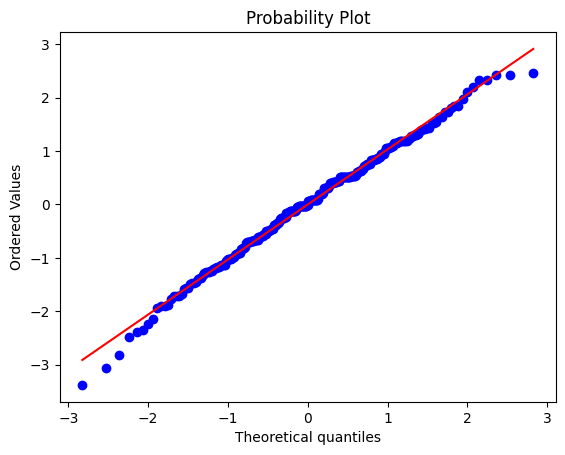

In [13]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#Residuos d enuestro modelo
residuos = model.resid

# Shapiro-Wilk
stat, p_value = stats.shapiro(residuos)
print(f'Shapiro-Wilk Test: p-value = {p_value}')

# Gráfico 
stats.probplot(residuos, dist="norm", plot=plt)
plt.show()

In [14]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import matplotlib.pyplot as plt

# --- 1. PRUEBA DE HOMOCEDASTICIDAD (Breusch-Pagan) ---
# Variables independientes del modelo
X = model.model.exog  # Obtiene las variables independientes de la regresión
residuos = model.resid  # Residuos del modelo

# Prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X)
print(f'Breusch-Pagan Test: p-value = {bp_test[1]}')

# --- 2. GRÁFICO DE RESIDUOS VS VALORES AJUSTADOS ---
plt.scatter(model.fittedvalues, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs valores ajustados')
plt.show()

# --- 3. MULTICOLINEALIDAD (Factor de Inflación de Varianza - VIF) ---
# Calcula VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = model.model.exog_names  # Nombres de las variables
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print("\nFactor de Inflación de Varianza (VIF):")
print(vif_data)


Breusch-Pagan Test: p-value = 0.21114173140798553



Factor de Inflación de Varianza (VIF):
                              Variable        VIF
0                                const  23.432547
1  Optimismo Futuro Ciencia/Tecnologia   1.402572
2          Apoyo Familiar Ciencia/Mate   1.228852
3            Innovaciones Tecnologicas   1.247980
4          Maestros Ciencia/tecnologia   1.142882
5  Sector_de_interes_futuro_Tecnología   1.073440


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8ab1c886-cf9b-4762-a261-f6fc9a56cef2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>